### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [1]:
# Import the required libraries and dependencies
# YOUR CODE HERE

import pandas as pd
import numpy as np
import requests
import json
import os
from dotenv import load_dotenv
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline



#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [2]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Review the first 5 rows of the DataFrame
# YOUR CODE HERE

csvpath = Path('/Users/theo/Desktop/Local_Workspace/TRG_Challenge_4/Resources/whale_navs.csv')

whale_df = pd.read_csv(csvpath, index_col='date', parse_dates=True, infer_datetime_format=True)

whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


In [3]:
whale_df.describe()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
count,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000
mean,30.917449,14.846051,60.738068,56.672164,250.638925
std,0.485997,0.240011,0.751144,4.185067,41.005779
min,29.982497,14.032967,59.375252,51.105327,182.860000
25%,30.453881,14.714174,60.230331,52.088281,210.157500
50%,30.795678,14.882191,60.594338,57.766241,247.425000
75%,31.350904,14.991809,60.766422,60.369093,283.262500
max,32.315955,15.438711,63.511175,65.578492,357.700000


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [4]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.
# YOUR CODE HERE


whale_df.isnull()

whale_df.isnull().sum()




SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
S&P 500                        0
dtype: int64

In [5]:
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


---

In [6]:
whale_df.tail()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,31.546221,14.364969,63.319419,64.668648,342.57
2020-09-08,31.491425,14.337851,63.238988,64.344083,333.21
2020-09-09,31.526541,14.368297,63.409792,64.460992,339.79
2020-09-10,31.486896,14.388256,63.308920,64.306412,333.89
2020-09-11,31.473747,14.360482,63.281442,64.241088,334.06


In [7]:
whale_df.duplicated().sum()


0

In [8]:
whale_df.dtypes


SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
S&P 500                        float64
dtype: object

In [9]:
daily_returns = whale_df.pct_change().dropna()

daily_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


In [10]:
daily_returns.tail()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,-0.001079,0.005050,-0.000653,-0.003985,-0.008165
2020-09-08,-0.001737,-0.001888,-0.001270,-0.005019,-0.027323
2020-09-09,0.001115,0.002123,0.002701,0.001817,0.019747
2020-09-10,-0.001258,0.001389,-0.001591,-0.002398,-0.017364
2020-09-11,-0.000418,-0.001930,-0.000434,-0.001016,0.000509


## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='date'>

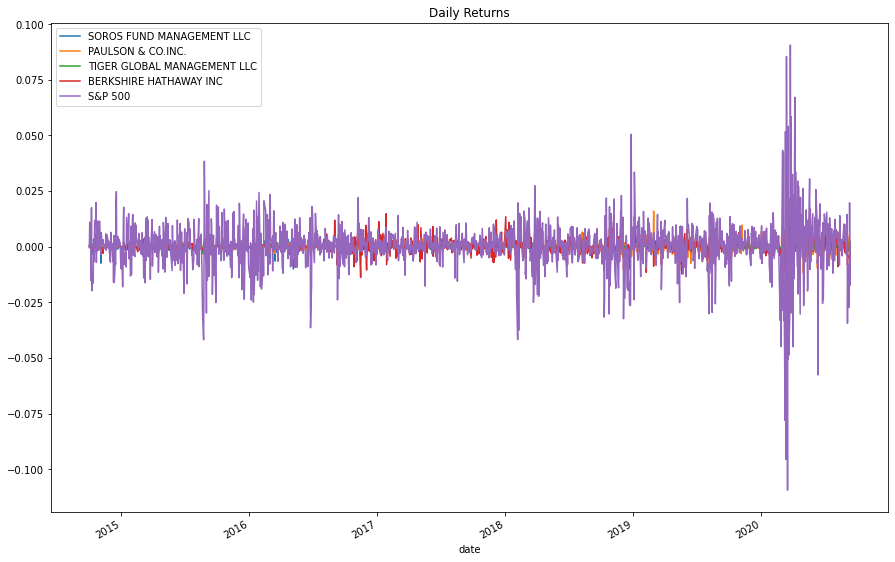

In [11]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
# YOUR CODE HERE

daily_returns.plot(title="Daily Returns", figsize=(15,10))


#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [12]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
# YOUR CODE HERE

cumulative_returns = (1 + daily_returns).cumprod().dropna()

cumulative_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,0.999558,1.000150,1.000013,1.000171,1.000154
2014-10-03,1.000609,1.000518,1.000407,1.001420,1.011165
2014-10-06,1.003066,1.000510,1.000474,1.001688,1.009982
2014-10-07,1.000437,1.000193,1.000265,1.001100,0.994392
2014-10-08,1.000828,1.000563,1.000507,1.001943,1.011783


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [13]:
cumulative_returns.tail()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='date'>

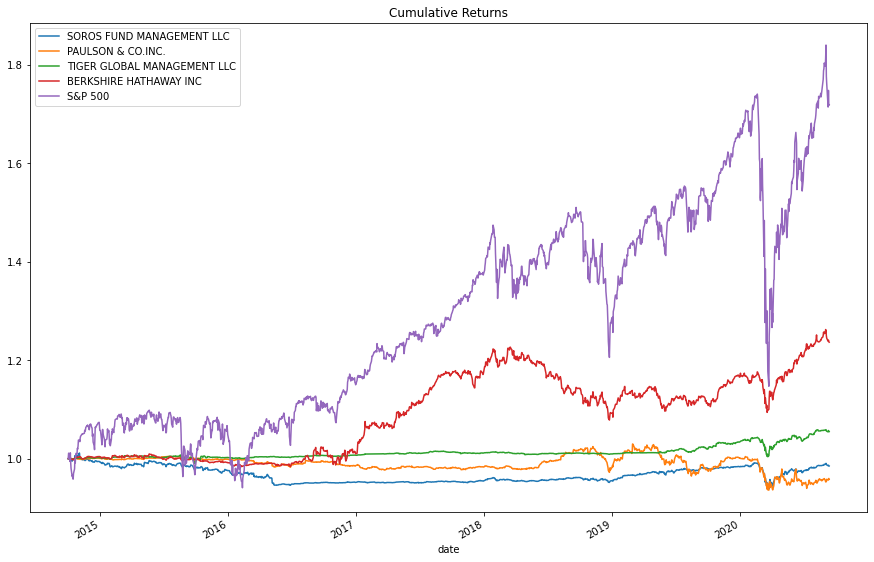

In [14]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

cumulative_returns.plot(title="Cumulative Returns", figsize=(15,10))


#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

In [15]:
# The S&P 500 outperformed the 4 fund portfolios.

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** # YOUR ANSWER HERE

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Returns'}>

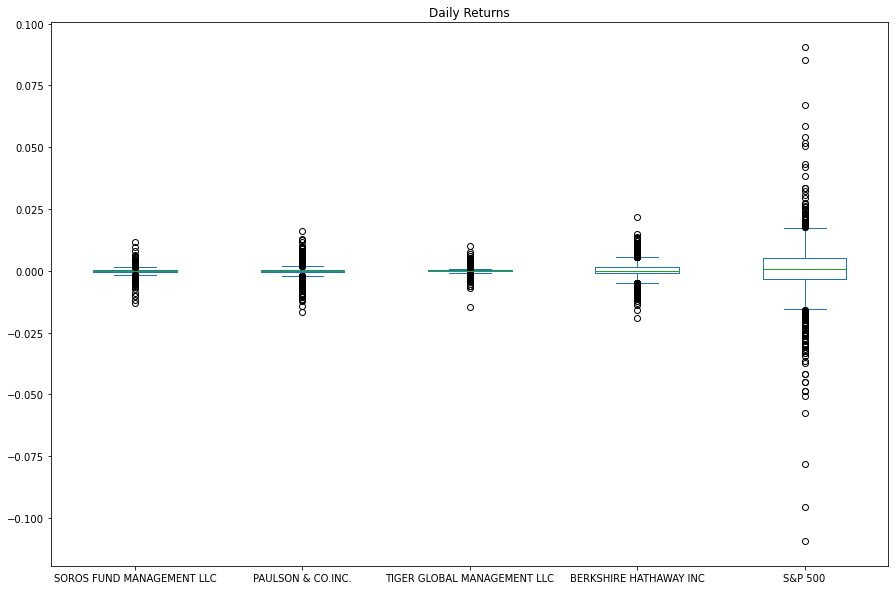

In [16]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

daily_returns.plot(title="Daily Returns", figsize=(15,10), kind='box')


#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [17]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

four_funds = whale_df.drop('S&P 500', axis=1)

four_funds.head()

                                   

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712
2014-10-02,31.936110,14.994072,59.978626,51.957619
2014-10-03,31.969707,14.999596,60.002264,52.022484
2014-10-06,32.048215,14.999471,60.006244,52.036387
2014-10-07,31.964216,14.994720,59.993735,52.005864


<AxesSubplot:title={'center':'Four Funds'}>

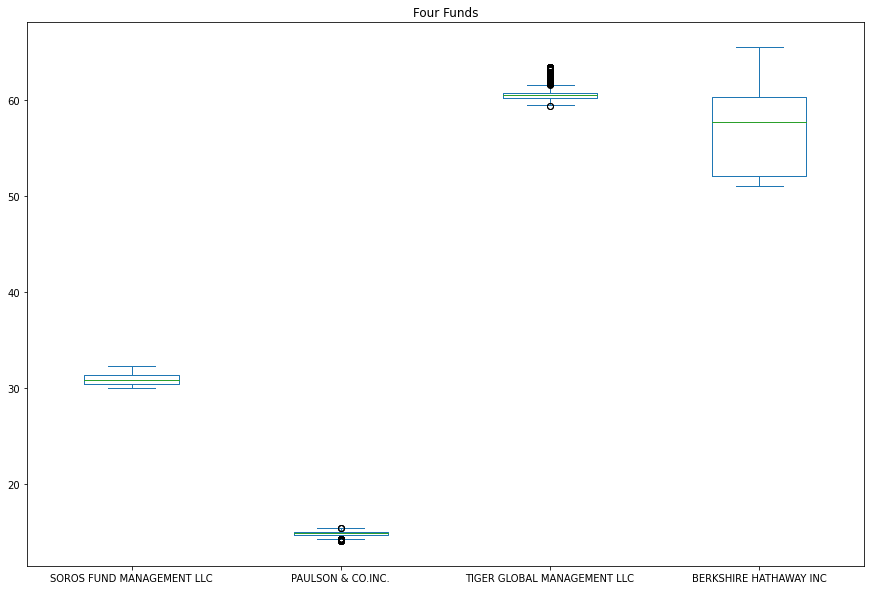

In [18]:
four_funds.plot(title="Four Funds", figsize=(15,10), kind='box')


#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

In [19]:
# Tiger had the least volatility, while Berkshire had the most. 

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** # YOUR ANSWER HERE

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [20]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
# YOUR CODE HERE

daily_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


In [21]:
standard_deviation = daily_returns.std()

standard_deviation.head()


SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
TIGER GLOBAL MANAGEMENT LLC    0.000996
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [22]:
standard_deviation_sorted = standard_deviation.sort_values()

standard_deviation_sorted.head()


TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [23]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
# YOUR CODE HERE

annualized_standard_deviation = standard_deviation * np.sqrt(252)

annualized_standard_deviation.head()


SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
TIGER GLOBAL MANAGEMENT LLC    0.015804
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

In [24]:
annualized_standard_deviation.sort_values()


TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [25]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

daily_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


<AxesSubplot:title={'center':'21 Day Standard Rolling Window'}, xlabel='date'>

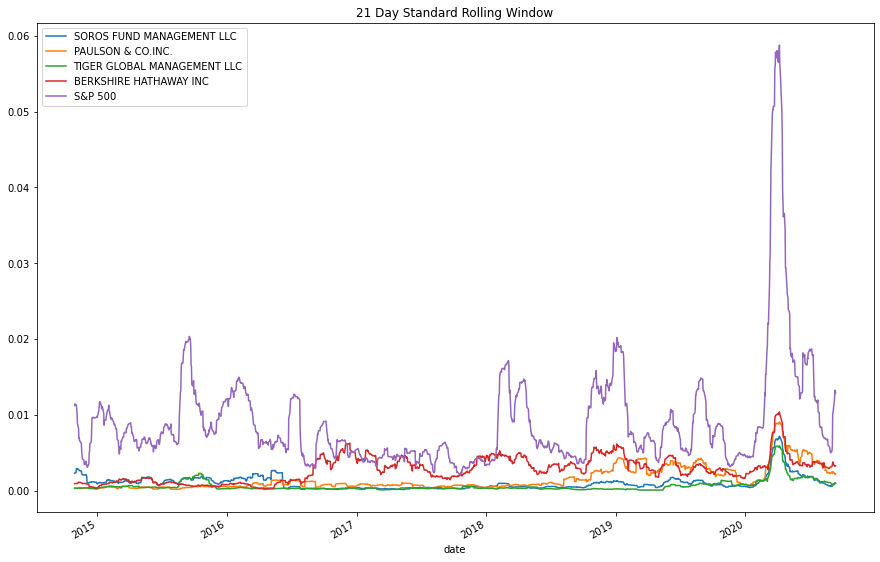

In [26]:
daily_returns.rolling(window=21).std().plot(title='21 Day Standard Rolling Window', figsize=(15,10))


#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [27]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

four_funds.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712
2014-10-02,31.936110,14.994072,59.978626,51.957619
2014-10-03,31.969707,14.999596,60.002264,52.022484
2014-10-06,32.048215,14.999471,60.006244,52.036387
2014-10-07,31.964216,14.994720,59.993735,52.005864


<AxesSubplot:title={'center':'Four Funds 21 Day Standard Deviation Rolling Window'}, xlabel='date'>

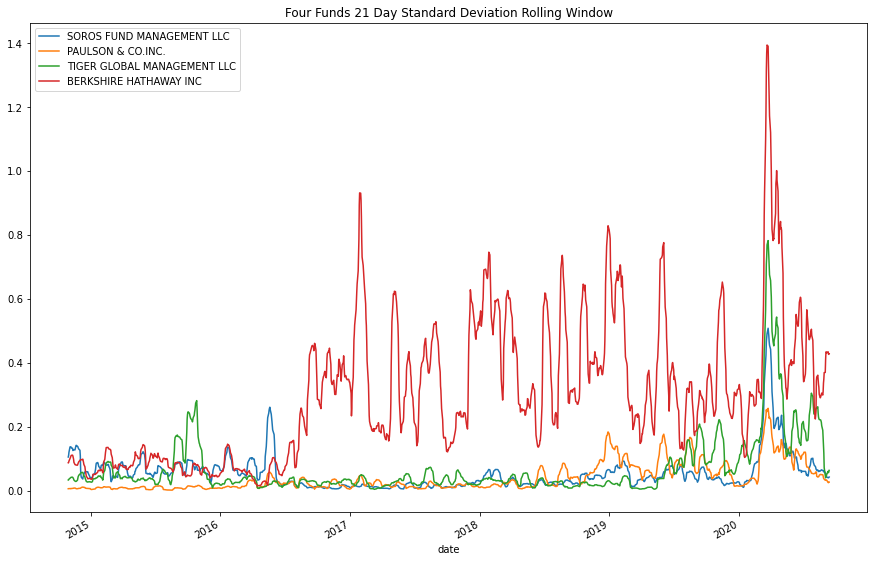

In [28]:
four_funds.rolling(window=21).std().plot(title='Four Funds 21 Day Standard Deviation Rolling Window', figsize=(15,10))


#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** # YOUR ANSWER HERE

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** # YOUR ANSWER HERE


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** # YOUR ANSWER HERE

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [29]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
# YOUR CODE HERE
year_trading_days = 252

annual_average_return = daily_returns.mean() * year_trading_days

annual_average_return.head()


SOROS FUND MANAGEMENT LLC     -0.002281
PAULSON & CO.INC.             -0.006633
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [30]:
annual_average_return.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [31]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
# YOUR CODE HERE
sharpe_ratios = annual_average_return / annualized_standard_deviation

sharpe_ratios.head()


SOROS FUND MANAGEMENT LLC     -0.102290
PAULSON & CO.INC.             -0.189998
TIGER GLOBAL MANAGEMENT LLC    0.579002
BERKSHIRE HATHAWAY INC         0.717512
S&P 500                        0.589612
dtype: float64

In [32]:
sharpe_ratios.sort_values()


PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Sharpe Ratios'}>

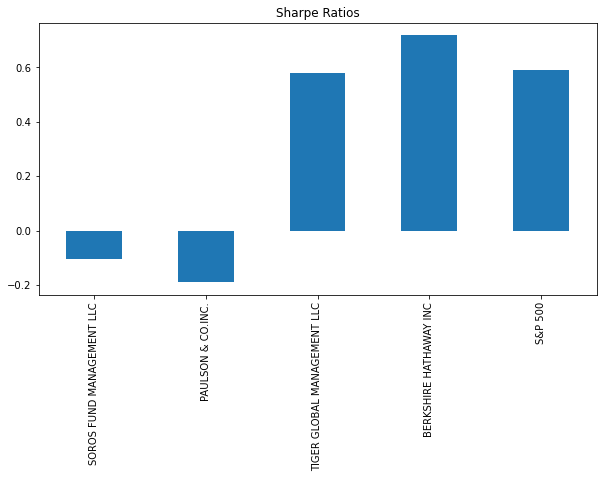

In [33]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

sharpe_ratios.plot.bar(title='Sharpe Ratios', figsize=(10,5))


#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** # YOUR ANSWER HERE

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [34]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
# YOUR CODE HERE

variance_df = daily_returns.rolling(window=60).var().dropna()

variance_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-12-26,0.000004,1.132199e-07,9.466762e-08,6.292317e-07,0.000078
2014-12-29,0.000004,1.130187e-07,9.482189e-08,6.297534e-07,0.000078
2014-12-30,0.000004,1.110504e-07,9.297971e-08,6.062019e-07,0.000077
2014-12-31,0.000004,1.134085e-07,9.581520e-08,6.124902e-07,0.000079
2015-01-02,0.000003,1.119369e-07,9.490804e-08,6.059927e-07,0.000075


#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [35]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
# YOUR CODE HERE

f_1 = daily_returns.drop('SOROS FUND MANAGEMENT LLC', axis=1)
#f_2= whale_df.drop('PAULSON & CO.INC.', axis=1)


f_1.columns


Index(['PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC',
       'BERKSHIRE HATHAWAY INC', 'S&P 500'],
      dtype='object')

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [51]:
f_2 = f_1.drop('PAULSON & CO.INC.', axis=1)

f_2.columns


Index(['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'S&P 500'], dtype='object')

In [52]:
tiger_3 = f_2.drop('BERKSHIRE HATHAWAY INC', axis=1)

tiger_3.columns


Index(['TIGER GLOBAL MANAGEMENT LLC', 'S&P 500'], dtype='object')

In [53]:
tiger_3.head()


,TIGER GLOBAL MANAGEMENT LLC,S&P 500
date,,
2014-10-02,0.000013,0.000154
2014-10-03,0.000394,0.011009
2014-10-06,0.000066,-0.001170
2014-10-07,-0.000208,-0.015436
2014-10-08,0.000242,0.017489


In [39]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
# YOUR CODE HERE


In [54]:
tiger_3_variance = f_3.var()

tiger_3_variance.head()

# print(f"{f_3_variance}")


TIGER GLOBAL MANAGEMENT LLC    9.911906e-07
S&P 500                        1.333940e-04
dtype: float64

In [55]:
tiger_3.columns


Index(['TIGER GLOBAL MANAGEMENT LLC', 'S&P 500'], dtype='object')

In [57]:
tiger_3 = f_2.drop('BERKSHIRE HATHAWAY INC', axis=1)

tiger_4 = tiger_3.drop("S&P 500", axis=1)

tiger_4.columns


Index(['TIGER GLOBAL MANAGEMENT LLC'], dtype='object')

In [58]:
tiger_4_variance = f_4.var()

tiger_4_variance.head()


TIGER GLOBAL MANAGEMENT LLC    9.911906e-07
dtype: float64

In [59]:
tiger_3.head()


,TIGER GLOBAL MANAGEMENT LLC,S&P 500
date,,
2014-10-02,0.000013,0.000154
2014-10-03,0.000394,0.011009
2014-10-06,0.000066,-0.001170
2014-10-07,-0.000208,-0.015436
2014-10-08,0.000242,0.017489


##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [60]:
sp_1 = tiger_3.drop('TIGER GLOBAL MANAGEMENT LLC', axis=1)

sp_1.head()


,S&P 500
date,
2014-10-02,0.000154
2014-10-03,0.011009
2014-10-06,-0.001170
2014-10-07,-0.015436
2014-10-08,0.017489


In [61]:
sp_variance = sp_1.var()

sp_variance.head()


S&P 500    0.000133
dtype: float64

In [65]:
# Calculate the average of the 60-day rolling beta
# YOUR CODE HERE

sp_rolling_variance = sp_1.rolling(window=60).var().dropna()

sp_rolling_variance.head()


,S&P 500
date,
2014-12-26,0.000078
2014-12-29,0.000078
2014-12-30,0.000077
2014-12-31,0.000079
2015-01-02,0.000075


In [ ]:
sp_rolling_variance = sp_1.rolling(window=60).var().dropna()

sp_rolling_variance.head()


In [66]:
tiger_5 = tiger_3.drop('S&P 500', axis=1)

tiger_5.head()


,TIGER GLOBAL MANAGEMENT LLC
date,
2014-10-02,0.000013
2014-10-03,0.000394
2014-10-06,0.000066
2014-10-07,-0.000208
2014-10-08,0.000242


In [67]:
tiger_rolling_variance = tiger_5.rolling(window=60).var().dropna()

tiger_rolling_variance.head()


,TIGER GLOBAL MANAGEMENT LLC
date,
2014-12-26,9.466762e-08
2014-12-29,9.482189e-08
2014-12-30,9.297971e-08
2014-12-31,9.581520e-08
2015-01-02,9.490804e-08


##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [ ]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE


##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [ ]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
# YOUR CODE HERE


##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [ ]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
# YOUR CODE HERE


##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [ ]:
# Calculate the average of the 60-day rolling beta
# YOUR CODE HERE


##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [ ]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE


#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** # YOUR ANSWER HERE


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # YOUR ANSWER HERE

---